In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [126]:
import random
import scipy
from scipy.stats import ttest_1samp
import statsmodels.api as sm
import scipy.stats as stats
from prettytable import PrettyTable

In [22]:
#0 - monday

In [23]:
%%time
df = pd.read_csv('nifty.csv')

CPU times: user 725 ms, sys: 117 ms, total: 842 ms
Wall time: 874 ms


In [24]:
%%time
nifty = pd.read_csv('bank_nifty.csv')

CPU times: user 675 ms, sys: 116 ms, total: 791 ms
Wall time: 856 ms


In [25]:
nifty


,name,date,time,open,high,low,close
0,BANKNIFTY,2010-03-02,09:01:00,8826.90,8856.95,8826.90,8839.80
1,BANKNIFTY,2010-03-02,09:02:00,8840.75,8853.90,8832.80,8852.30
2,BANKNIFTY,2010-03-02,09:03:00,8855.70,8855.70,8844.65,8846.65
3,BANKNIFTY,2010-03-02,09:04:00,8843.85,8850.70,8843.75,8846.70
4,BANKNIFTY,2010-03-02,09:05:00,8846.40,8846.40,8837.75,8841.60
...,...,...,...,...,...,...,...
1037382,BANKNIFTY,2021-04-30,15:28:00,32737.45,32741.95,32722.90,32725.95
1037383,BANKNIFTY,2021-04-30,15:29:00,32730.90,32733.65,32713.35,32718.80
1037384,BANKNIFTY,2021-04-30,15:30:00,32715.90,32726.20,32706.25,32714.35
1037385,BANKNIFTY,2021-04-30,15:31:00,32724.90,32724.90,32724.90,32724.90


In [26]:
%%time
nifty.date = pd.to_datetime(nifty.date)

CPU times: user 143 ms, sys: 15.7 ms, total: 159 ms
Wall time: 166 ms


In [27]:
%%time
nifty.time = pd.to_datetime(nifty.time).dt.time

CPU times: user 43.1 s, sys: 235 ms, total: 43.3 s
Wall time: 44.2 s


In [28]:
%%time
nifty['year'] = nifty.date.dt.year
nifty['month'] = nifty.date.dt.month
nifty['day'] = nifty.date.dt.day
nifty['dayofweek'] = nifty.date.dt.dayofweek

CPU times: user 219 ms, sys: 17.4 ms, total: 236 ms
Wall time: 294 ms


In [29]:
df['drawdown'] = (df['close']/df['close'].cummax() -1)*100

nifty['drawdown'] = (nifty['close']/nifty['close'].cummax() -1)*100

In [30]:
#percent times nifty trades below -11% of high
df[df['drawdown']<=-11].shape[0]/df.shape[0]

0.41110841840849144

In [31]:
#percent times bank nifty trades below -11% of high
nifty[nifty['drawdown']<=-11].shape[0]/df.shape[0]

0.4038985003668233

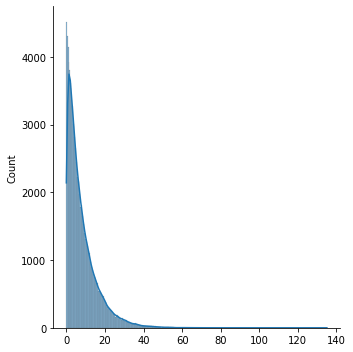

In [49]:
#This a how an exponential distribution looks
#scale = beta = 1/lambda
x = np.random.exponential(scale=8, size=100000)

sns.displot(x, kde = True)

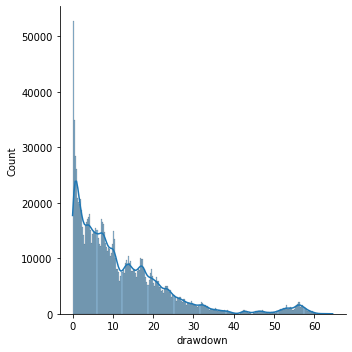

In [35]:
#Our negative of drawdowns looks similar to above but not exactly same as on right, probability is 
#fatter on right than exponential distribution

sns.displot(-df['drawdown'], kde = True)

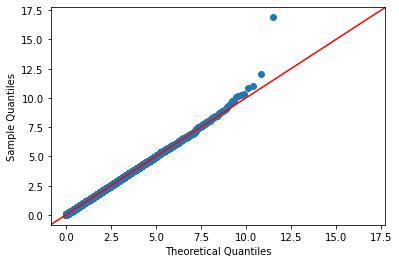

In [56]:
#This  is how a quantile - quantile plot of exponential distribution looks
plotdf = sm.qqplot(x,line='45',fit=True, dist=stats.expon, scale = 8)

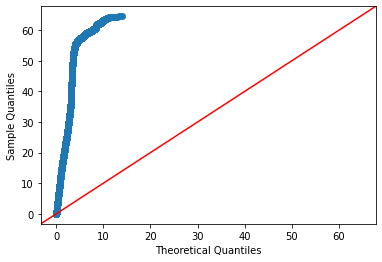

In [51]:
plotdf = sm.qqplot(-df['drawdown'],line='45',fit=True, dist = stats.expon, scale = 8)

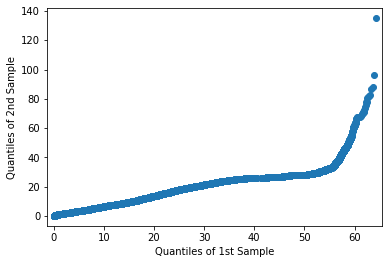

In [58]:
from statsmodels.graphics.gofplots import qqplot_2samples
qq2 = qqplot_2samples(-df['drawdown'], x)

In [59]:
nifty['lag'] = nifty.close.shift(1)

In [60]:
nifty.dropna(axis=0, inplace =True)

In [61]:
nifty['r'] = (nifty.close/nifty.lag - 1)*100

In [62]:
nifty.r

1          0.141406
2         -0.063825
3          0.000565
4         -0.057649
5         -0.053158
             ...   
1037382   -0.033296
1037383   -0.021848
1037384   -0.013601
1037385    0.032249
1037386    0.173874
Name: r, Length: 1037386, dtype: float64

In [63]:
#Filter thurday 3:15 data points
new = nifty[(nifty.dayofweek == 3) & (nifty.time == datetime.time(15,15))]

In [64]:
#calculate returns i.e one thurday from 3:15 PM to next thurday 3:15 PM
new['ret'] = (new.close/new.close.shift(1) - 1)*100

/var/folders/36/2w68f_916m5_4nk8vnz8j2yw0000gn/T/ipykernel_36564/3485469160.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['ret'] = (new.close/new.close.shift(1) - 1)*100


In [65]:
new.dropna(axis = 0, inplace =True)

/Users/shivams/miniconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [66]:
#Data which is beyond 1 stdv from mean on positive side of distribution = 12.59%
new[(new.ret >= new.ret.mean()+1*new.ret.std())].shape[0]/new.shape[0]

0.1259124087591241

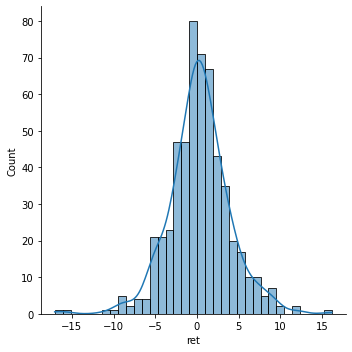

In [121]:
sns.displot(new.ret, kde = True)

In [131]:
#A bit Negatively skewed
#Kurtosis approximately equal to normal which is 3
table = PrettyTable()
table.title = 'Summary Table of Parameters'
table.field_names = ['Parameter', 'Value']
table.add_row(['Mean Of Thurday to Thursday, 3:15PM to 3:15PM Return', new.ret.mean()])
table.add_row(['Median Of Thurday to Thursday, 3:15PM to 3:15PM Return', new.ret.median()])
table.add_row(['Standarad Deviation Of Thurday to Thursday, 3:15PM to 3:15PM Return', new.ret.std()])
table.add_row(['Skewness Of Thurday to Thursday, 3:15PM to 3:15PM Return', new.ret.skew()])
table.add_row(['Kurtosis Of Thurday to Thursday, 3:15PM to 3:15PM Return', new.ret.kurt()])
print(table)

+------------------------------------------------------------------------------------------+
|                               Summary Table of Parameters                                |
+---------------------------------------------------------------------+--------------------+
|                              Parameter                              |       Value        |
+---------------------------------------------------------------------+--------------------+
|         Mean Of Thurday to Thursday, 3:15PM to 3:15PM Return        | 0.3080266047442923 |
|        Median Of Thurday to Thursday, 3:15PM to 3:15PM Return       | 0.2737535261986501 |
| Standarad Deviation Of Thurday to Thursday, 3:15PM to 3:15PM Return | 3.6543515670217723 |
|       Skewness Of Thurday to Thursday, 3:15PM to 3:15PM Return      | -0.077971161422943 |
|       Kurtosis Of Thurday to Thursday, 3:15PM to 3:15PM Return      | 2.312016767768807  |
+---------------------------------------------------------------------

In [123]:
#[.3, 99.7] percentiles are approx. [3.2 standard deviation below the mean, 3.2 standard deviation above the mean]
# which means 3 standard deviations of our returns data cover slightly less data points than a normal distribution, 
# similar to a t-distribution where extreme data points having slightly more probability than a normal distribution

print('[0.3%, 99.7%]------------------>', np.percentile(new.ret, [0.3, 99.7]))
print('[mean-3.2*stdv, mean+3.2*stdv]->', [new.ret.mean()-3.2*new.ret.std(), new.ret.mean()+ 3.2*new.ret.std()])

[0.3%, 99.7%]------------------> [-12.72548357  12.05524786]
[mean-3.2*stdv, mean+3.2*stdv]-> [-11.38589840972538, 12.001951619213964]


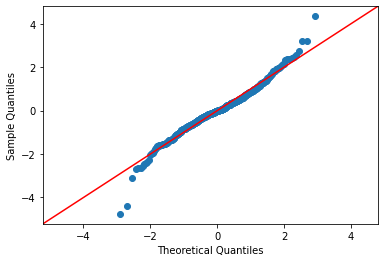

In [69]:
plot1 = sm.qqplot(new.ret,line='45',fit=True,dist=stats.norm)

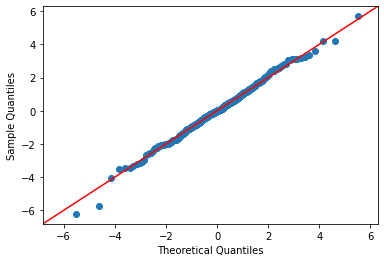

In [70]:
#We can see as our return variable follows a t distrution
plot2 = sm.qqplot(new.ret,line='45',fit=True, dist=stats.t)

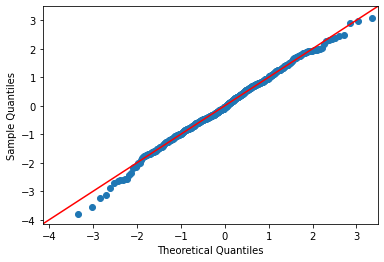

In [101]:
#How a t distribution with (n-1) degree of freedom looks in a 1 sample qq plot
trand = np.random.standard_t(df = new.shape[0]-1, size = new.shape[0] )
plottqq2 = sm.qqplot(trand,line='45', fit=True, dist=stats.t)

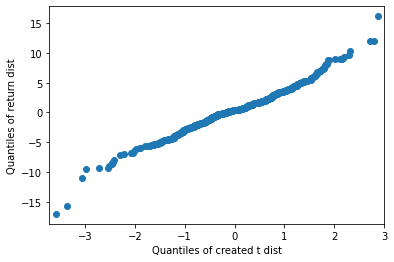

In [122]:
#How our returns data quantiles look w.r.t above created t distrution(2 sample qq plot)
qq2 = qqplot_2samples(trand, new.ret, xlabel='Quantiles of created t dist', ylabel='Quantiles of return dist')

In [132]:
#checking if the mean of any random sample will be close to our calculated mean using 1 sample t test
ps = []  #storing p values

for i in range(100, 548, 10):
    ret_sample = np.random.choice(new['ret'], i)
    ttest, pvalue = ttest_1samp(ret_sample, 0.3080)
    ps.append(pvalue)
    

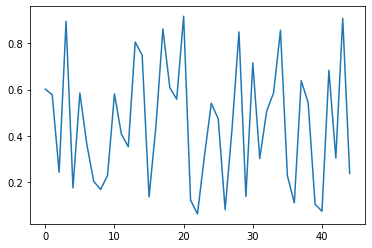

In [21]:
#Why the p value goes down sometimes?
plt.plot(ps)

In [22]:
#Avergae p value comes out to be 45% for different sizes of random samples which suggest that our null 
#hypothesis that our mean is 0.3080 is not rejected
sum(ps)/len(ps)

0.4506135324227801

In [23]:
#Sample stdv is almost similar
ret_sample.std()

3.8006503405966052

In [24]:
#74.45% of data is in between 1 stdv from the mean i.e (mean-stdv,  mean+stdv)
new[(new.ret <= new.ret.mean() + new.ret.std()) & (new.ret >= new.ret.mean() - new.ret.std()) ].shape[0]/new.shape[0]

0.7445255474452555

In [25]:
#94.52% of data is in between 2 stdv from the mean i.e (mean - 2*stdv,  mean + 2*stdv)
new[(new.ret <= new.ret.mean() + 2*new.ret.std()) & (new.ret >= new.ret.mean() - 2*new.ret.std()) ].shape[0]/new.shape[0]

0.9452554744525548

In [26]:
#98.90% of data is in between 3 stdv from the mean
new[(new.ret <= new.ret.mean() + 3*new.ret.std()) & (new.ret >= new.ret.mean() - 3*new.ret.std()) ].shape[0]/new.shape[0]

0.9890510948905109

In [27]:
#99.45% of data is in between 4 stdv from the mean
new[(new.ret <= new.ret.mean() + 4*new.ret.std()) & (new.ret >= new.ret.mean() - 4*new.ret.std()) ].shape[0]/new.shape[0]

0.9945255474452555

In [28]:
current_spot = 36570 #for nifty bank
#74.45% chances that spot will remain in this range over next week thurday 3:15
(current_spot*(1 - (new.ret.mean() + new.ret.std())/100), current_spot*(1 + (new.ret.mean() + new.ret.std())/100))

(35120.958302585146, 38019.04169741485)

In [29]:

#94.52% chances that spot will remain in this range over next week thurday 3:15
(current_spot*(1 - (new.ret.mean() + 2*new.ret.std())/100), current_spot*(1 + (new.ret.mean() + 2*new.ret.std())/100))

(33784.561934525285, 39355.438065474715)